In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

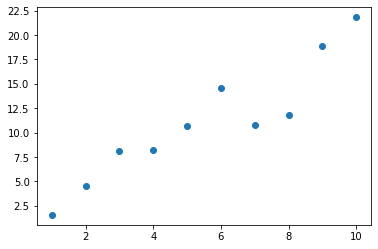

In [2]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))

plt.scatter(X[0],X[1])

In [3]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.00000,8.000000,9.000000,10.000000
1,1.561778,4.572009,8.077374,8.257275,10.669477,14.554458,10.81141,11.793015,18.906993,21.826419


In [4]:
X.shape

(2, 10)

Mean vector:  [ 5.5       11.1030209]
[[-4.5        -3.5        -2.5        -1.5        -0.5         0.5
   1.5         2.5         3.5         4.5       ]
 [-9.54124249 -6.53101149 -3.02564649 -2.8457463  -0.4335438   3.45143679
  -0.2916108   0.68999441  7.80397197 10.72339821]]


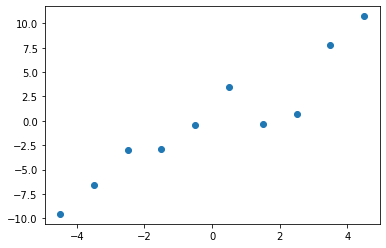

In [5]:
#Find m - mean vector, and Xcentered - X-mean
#Your code is here
Xcentered = X - X.mean(axis=1, keepdims=True)
m = np.mean(X, axis=1)

print("Mean vector: ", m)
print(Xcentered)

plt.scatter(Xcentered[0],Xcentered[1])

In [6]:
Xcentered.shape

(2, 10)

In [7]:
import pandas as pd
pd.DataFrame(Xcentered)

,0,1,2,3,4,5,6,7,8,9
0,-4.500000,-3.500000,-2.500000,-1.500000,-0.500000,0.500000,1.500000,2.500000,3.500000,4.500000
1,-9.541242,-6.531011,-3.025646,-2.845746,-0.433544,3.451437,-0.291611,0.689994,7.803972,10.723398


In [8]:
covmat = np.cov(Xcentered)
np.cov(Xcentered)

array([[ 9.16666667, 17.38068012],
       [17.38068012, 37.72188677]])

In [9]:
np.cov(Xcentered)[0,0]

9.166666666666666

In [10]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 9.16666667 17.38068012]
 [17.38068012 37.72188677]] 

Variance of X:  9.166666666666666
Variance of Y:  37.72188677083513
Covariance X and Y:  17.380680117522562


Находим собственные векторы матрицы ковариаций и проецируем на самый большой вектор (с самым большим собственным значением) все точки

In [11]:
eignums, vecs = np.linalg.eig(covmat)
v = vecs[:,np.argmax(eignums)]
Xnew = np.dot(v,Xcentered)
print(Xnew)

[ 10.54918138   7.40031989   3.80381293   3.21382406   0.60563392
  -3.33407954  -0.37737218  -1.69217421  -8.5511902  -11.61795605]


In [12]:
eignums

array([ 0.95120689, 45.93734654])

In [13]:
vecs

array([[-0.90408959, -0.42734298],
       [ 0.42734298, -0.90408959]])

In [14]:
vecs[:,0]

array([-0.90408959,  0.42734298])

In [15]:
vecs[:,1]

array([-0.42734298, -0.90408959])

In [16]:
np.argmax(eignums)

1

In [17]:
v

array([-0.42734298, -0.90408959])

In [18]:
n = 3 #номер элемента случайной величины
Xrestored = np.dot(Xnew[n],v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Restored:  [4.12659485 8.19743603]
Original:  [4.         8.25727459]


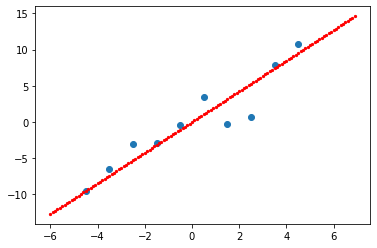

In [19]:
k= v[1]/v[0]

x1 = np.arange(-6,7,0.1)
y1 = [k*elem for elem in x1]
plt.scatter(Xcentered[0],Xcentered[1])
plt.scatter(x1,y1,color='red',s=5)
plt.show()

In [20]:
100 * max(eignums)/sum(eignums)

97.97134519166455

In [21]:
from sklearn.decomposition import PCA

#Apply PCA with n_components=1 to transposed Xcentered
#Your code is here
pca = PCA(n_components=1)
X_pca = pca.fit_transform(Xcentered.T)

In [22]:
print(v)
print(pca.components_)

[-0.42734298 -0.90408959]
[[0.42734298 0.90408959]]


In [23]:
pca.explained_variance_

array([45.93734654])

In [24]:
max(eignums)

45.93734654363298

In [25]:
pca.explained_variance_ratio_[0] * 100

97.97134519166454

In [26]:
###

In [27]:
def pca_np_1(x):

#centering data
  m = np.mean(x, axis =0)
  x_centered = x - m
#calculating covariance matrix
  x_cov=np.cov(x_centered.T)
#eigendecomposition
  eigenvals, eigenvecs = np.linalg.eig(x_cov)
#sorting
  i= np.argsort(eigenvals)[::-1]
  eigenvecs = eigenvecs[:,i]
  eigenvals= eigenvals[i]
  total_egnvalues = sum(eigenvals)
  var_exp = [(i/total_egnvalues) for i in sorted(eigenvals, reverse=True)]
  var_exp_ratio=round(sum(var_exp)*100, 1)

  return(eigenvals, eigenvecs, m,var_exp,var_exp_ratio)

In [29]:

data_evals, data_evecs,data_mean,data_exp,data_exp_ration = pca_np_1(X.T)
print("eigenvalues:", data_evals)
print("eigenvectors:", data_evecs)

eigenvalues: [45.93734654  0.95120689]
eigenvectors: [[-0.42734298 -0.90408959]
 [-0.90408959  0.42734298]]


In [30]:
print("exp_ratio:", data_exp)
print("exp_ratio:", data_exp_ration)

exp_ratio: [0.9797134519166456, 0.020286548083354446]
exp_ratio: 100.0


In [31]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
 
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean

    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        #self.sorted_components = self.eigen_values.argsort()[::-1]
        
        #self.projection_matrix = self.eigen_vectors[:,self.sorted_components][:,:self.no_of_components]
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance =self.eigen_values[self.sorted_components[:self.no_of_components]]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()
        return self  

In [32]:
pca=convers_pca(no_of_components=1)
pca.fit(X.T)

In [33]:
print(pca.eigen_values)
print(pca.eigen_vectors)
print(pca.sorted_components)


[ 0.95120689 45.93734654]
[[-0.90408959  0.42734298]
 [-0.42734298 -0.90408959]]
[1 0]


In [34]:
print(pca.projection_matrix)
print(pca.explained_variance)
print(pca.explained_variance_ratio)

[[-0.42734298 -0.90408959]]
[45.93734654]
[0.97971345]


In [35]:
pca=convers_pca(no_of_components=2)
pca.fit(Xcentered.T)

In [36]:
print(pca.eigen_values)
print(pca.eigen_vectors)
print(pca.sorted_components)

[ 0.95120689 45.93734654]
[[-0.90408959  0.42734298]
 [-0.42734298 -0.90408959]]
[1 0]


In [37]:
print(pca.projection_matrix)
print(pca.explained_variance)
print(pca.explained_variance_ratio)

[[-0.42734298 -0.90408959]
 [-0.90408959  0.42734298]]
[45.93734654  0.95120689]
[0.97971345 0.02028655]


In [38]:
from sklearn.decomposition import PCA

#Apply PCA with n_components=1 to transposed Xcentered
#Your code is here
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xcentered.T)

In [39]:
pca.explained_variance_ratio_

array([0.97971345, 0.02028655])

In [97]:
pca = PCA(n_components=2)
X_pca = pca.fit(Xcentered.T) #pca.fit_transformed(Xcentred.T)

In [98]:
pca.explained_variance_ratio_

array([0.97971345, 0.02028655])

In [99]:
pca.components_ #projection matrix

array([[ 0.42734298,  0.90408959],
       [ 0.90408959, -0.42734298]])

In [100]:
df_comp=pd.DataFrame(pca.components_)
df_comp

,0,1
0,0.427343,0.904090
1,0.904090,-0.427343


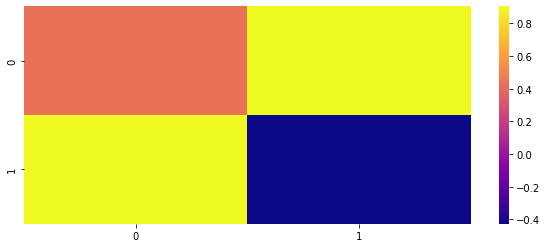

In [101]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(df_comp,cmap='plasma')

In [102]:
np.dot(Xcentered.T,pca.components_) #data_reduced

array([[-1.05491814e+01,  8.97985746e-03],
       [-7.40031989e+00, -3.73331643e-01],
       [-3.80381293e+00, -9.67235178e-01],
       [-3.21382406e+00, -1.40024676e-01],
       [-6.05633920e-01, -2.66772895e-01],
       [ 3.33407954e+00, -1.02290249e+00],
       [ 3.77372181e-01,  1.48075221e+00],
       [ 1.69217421e+00,  1.96535970e+00],
       [ 8.55119020e+00, -1.70659079e-01],
       [ 1.16179560e+01, -5.14165802e-01]])

In [89]:
x_pca=pca.transform(Xcentered.T)
x_pca #data_reduced

array([[-1.05491814e+01,  8.97985746e-03],
       [-7.40031989e+00, -3.73331643e-01],
       [-3.80381293e+00, -9.67235178e-01],
       [-3.21382406e+00, -1.40024676e-01],
       [-6.05633920e-01, -2.66772895e-01],
       [ 3.33407954e+00, -1.02290249e+00],
       [ 3.77372181e-01,  1.48075221e+00],
       [ 1.69217421e+00,  1.96535970e+00],
       [ 8.55119020e+00, -1.70659079e-01],
       [ 1.16179560e+01, -5.14165802e-01]])

In [103]:
display(x_pca.shape,Xcentered.T.shape)

(10, 2)

(10, 2)

Text(0.5, 0, 'pca2')

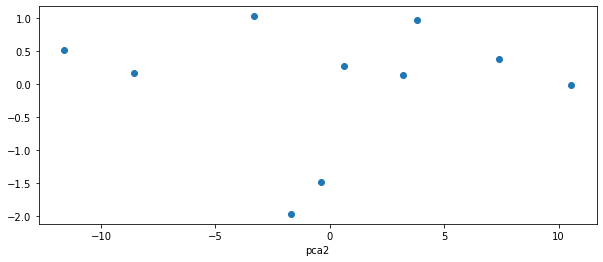

In [104]:
plt.figure(figsize=(10,4))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap="plasma")
plt.xlabel('pca1')
plt.xlabel("pca2")

In [105]:
data_original=np.dot(x_pca,pca.components_)+pca.mean_
data_original

array([[  4.5       ,   9.54124249],
       [  3.5       ,   6.53101149],
       [  2.5       ,   3.02564649],
       [  1.5       ,   2.8457463 ],
       [  0.5       ,   0.4335438 ],
       [ -0.5       ,  -3.45143679],
       [ -1.5       ,   0.2916108 ],
       [ -2.5       ,  -0.68999441],
       [ -3.5       ,  -7.80397197],
       [ -4.5       , -10.72339821]])

In [107]:
Xcentered.T

array([[-4.5       , -9.54124249],
       [-3.5       , -6.53101149],
       [-2.5       , -3.02564649],
       [-1.5       , -2.8457463 ],
       [-0.5       , -0.4335438 ],
       [ 0.5       ,  3.45143679],
       [ 1.5       , -0.2916108 ],
       [ 2.5       ,  0.68999441],
       [ 3.5       ,  7.80397197],
       [ 4.5       , 10.72339821]])

In [108]:
pca.mean_

array([0.00000000e+00, 1.77635684e-15])

In [109]:
pca=convers_pca(no_of_components=2)
pca.fit(Xcentered.T)

In [110]:
x_pca=pca.transform(Xcentered.T)
x_pca #data_reduced

array([[ 1.05491814e+01, -8.97985746e-03],
       [ 7.40031989e+00,  3.73331643e-01],
       [ 3.80381293e+00,  9.67235178e-01],
       [ 3.21382406e+00,  1.40024676e-01],
       [ 6.05633920e-01,  2.66772895e-01],
       [-3.33407954e+00,  1.02290249e+00],
       [-3.77372181e-01, -1.48075221e+00],
       [-1.69217421e+00, -1.96535970e+00],
       [-8.55119020e+00,  1.70659079e-01],
       [-1.16179560e+01,  5.14165802e-01]])

In [111]:
df_comp=pd.DataFrame(pca.projection_matrix)
df_comp

,0,1
0,-0.427343,-0.904090
1,-0.904090,0.427343


Text(0.5, 0, 'pca2')

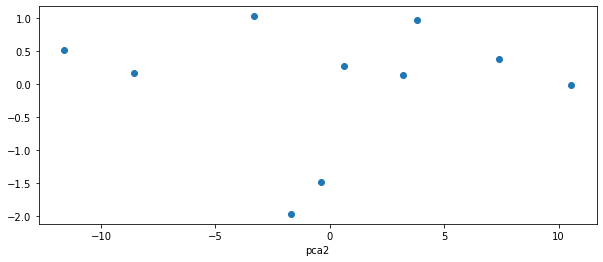

In [112]:
plt.figure(figsize=(10,4))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap="plasma")
plt.xlabel('pca1')
plt.xlabel("pca2")

In [113]:
pca.inverse_transform(x_pca)

array([[-4.5       , -9.54124249],
       [-3.5       , -6.53101149],
       [-2.5       , -3.02564649],
       [-1.5       , -2.8457463 ],
       [-0.5       , -0.4335438 ],
       [ 0.5       ,  3.45143679],
       [ 1.5       , -0.2916108 ],
       [ 2.5       ,  0.68999441],
       [ 3.5       ,  7.80397197],
       [ 4.5       , 10.72339821]])

In [116]:
Xcentered.T

array([[-4.5       , -9.54124249],
       [-3.5       , -6.53101149],
       [-2.5       , -3.02564649],
       [-1.5       , -2.8457463 ],
       [-0.5       , -0.4335438 ],
       [ 0.5       ,  3.45143679],
       [ 1.5       , -0.2916108 ],
       [ 2.5       ,  0.68999441],
       [ 3.5       ,  7.80397197],
       [ 4.5       , 10.72339821]])